# COGS 108 - Final Project 

# Overview

In this project, we attempted to determine whether the way a batter gets on base affects the number of wins in Major League Baseball. First we explored the relationship between walks, hits, and runs on wins by looking at real-world season data. After running multiple linear regression, we realized there was a problem with multicollinearity as hits and runs were highly correlated. To tackle this problem, we decided that simulating entire MLB seasons would be a more effective way of understanding the answer to our question. We created three simulations: one of a normal MLB season, one where players only got on base via walk, and finally one where the season was simulated normally, but Barry Bonds of the San Francisco Giants only reached base via walk. The 2001 MLB season was chosen as Barry Bonds set the single season home run record that year. After analyzing results from the simulations, we found that walking players onto base in general did not seem to have a significant impact on team win percentage, though only walking Barry Bonds did have a significant impact on the San Francisco Giants win percentage. 

# Names

- Justin Tat
- Abigail Sawtell
- Jack Mitchener
- Adam Tyler

# Research Question

Does the way the batter gets on base, either via walk or hit, influence the number of Wins in Major League Baseball?

## Background and Prior Work

We are interested in this question because we want to understand why the Rays were able to make it to the World Series this season but the Athletics failed to make it to the World Series in 2002. Major League Baseball teams and fans should be interested in this question because teams could get the same number of wins by spending significantly less money on their baseball team. The Dodgers pay 26.3 million dollars to two players, a starting pitcher and a right fielder, and their total roster is paid 108 million dollars, while the Rays paid a total of 28.3 million dollars to their entire roster. Clearly, something is going on that allows the Rays to compete at a similar level to the Dodgers with a significantly smaller budget.

The birth of data analytics changed the game of baseball, or at least how it was played. First receiving acclaim through the birth of Sabermetrics from Bill James1, baseball was analyzed within an inch of its life in pursuit of winning more while spending less. First being implemented in the 2002 Oakland A’s, Billy Beane (the general manager) and Bill DePodesta (Harvard-educated statistician) took the League by storm by focusing on data over traditional scouting by holding On Base Percentage (OBP) as the holy grail[1]. On Base Percentage is the percentage of the time a baseball player reaches base either by hit or walk. By signing “bad” players with higher OBP than average on frugal contracts because the League did not value them, Beane revolutionized what teams looked for. We’ve come a long way since then. Traditional moneyball relied solely on OBP but this statistic has been usurped by On Base Plus Slugging (OPS), while batting average was embraced by some. OPS takes the On Base Percentage and adds Slugging percentage for a different value. Slugging Percentage tells how the player gets on base each at bat, assigning different values for singles, doubles, triples, and home runs. OBP is clearly important to correlate wins, but there is other data that may be utilized to predict wins more accurately. While OBP and OPS are useful, OBP does not indicate how many bases the players are advancing[3] and OPS tells us how good the player is at getting around the bases during their at bat, but fails to take into account how the other runners are moving[2]. Because walks will only advance a runner currently on base when they are forced (either they are on first base, or all bases from first to their base are filled by a player), OPS does not indicate how walks vs. hits (single, double, or triple) affects how many bases the runner advances which will influence the total wins of the team. Keeping this in mind, assuming the same OBP, getting on base via hit will lead to a higher chance of winning the game because the hit allows the opportunity for the runner and the batter to advance more than one base, leading to more runs scored.

References (include links):
- 1) Background of Billy Beane and Moneyball: https://www.litcharts.com/lit/moneyball/summary
- 2) Definition of OPS: http://m.mlb.com/glossary/standard-stats/on-base-plus-slugging
- 3) Definition of OBP: http://m.mlb.com/glossary/standard-stats/on-base-percentage

# Hypothesis


Assuming the same On Base Percentage, getting on base via hit will lead to a higher chance of winning the game. This is because the hit allows the opportunity of advancing more than one base both for the batter and any runners currently on base.

# Dataset(s)

- Dataset Name: 2001 MLB Schedule
- Link to the dataset: https://www.retrosheet.org/schedule/
- Number of observations: 2431

This dataset consists of the schedule of games for every MLB team and will be used for season simulation

This dataset will be used in the simulation to provide a framework to determine which teams will play each other.

- Dataset Name: 2001 Season Standings
- Link to the dataset: https://www.baseball-reference.com/leagues/MLB/2001-standings.shtml
- Number of observations: 32

This dataset consists of the standings of each team (Wins vs. Losses) at the end of the 2001 MLB season

These standings will be used to compare the simulated seasons to the real-life seasons to see if there is a signicant change between simulations

- Dataset Name: 2001 Season Stats by Team
- Link to the dataset: https://www.baseball-reference.com/leagues/MLB/2001.shtml
- Number of observations: 33

This dataset consists of the season statistics for each team including type of base hit (1B means single, 2B means double etc.) homeruns (HR), hit by pitch (HBP), walks (BB), On-Base Percentage (OBP), wins (W), losses (L), and games played (GP). 

This dataset will be used to generate a simulation of an MLB season. Specific team statistics will be used to determine how well each team does during the season and generate standings for each team.

- Dataset Name: 2001 Season Statistics by Player (SFG)
- Link to the dataset: https://www.baseball-reference.com/teams/SFG/2001.shtml
- Number of observations: 46

This dataset consists of the season statistics by player for the San Francisco Giants including type of base hit (1B means single, 2B means double etc.) homeruns (HR), hit by pitch (HBP), walks (BB), On-Base Percentage (OBP), wins (W), losses (L), and games played (GP).

This dataset will be used to allow us to generate simulations in which Barry Bonds is always walked and will be used to observe whether or not it matters how you get on base. 

# Setup

In [1]:
import random
import numpy
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

## Clean 2001 Season Data for Visualizations and Analysis

In [2]:
#Import 2001 Season Standings
Standings_2001 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/2001_SeasonStandings.csv?token=ARLS5TM45WCV5SVZMQEX5MS73K626')

#Include only necessary columns
Standings_2001 = Standings_2001[['Rk', 'Tm', 'W', 'L', 'W-L%']]
Standings_2001.head()

,Rk,Tm,W,L,W-L%
0,1.0,SEA,116,46,0.716
1,2.0,OAK,102,60,0.630
2,3.0,NYY,95,65,0.594
3,4.0,HOU,93,69,0.574
4,5.0,STL,93,69,0.574


In [3]:
#Import 2001 Data
SeasonData_2001 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/2001seasondata.csv?token=ARLS5TKO2KKPJOC2TJ5S6NC73K65I')

#Include only necessary columns
SeasonData_2001 = SeasonData_2001[['Tm', 'R', 'H', 'BB', 'OBP']]

#Add Standings to SeasonData_2001
SeasonData_2001 = SeasonData_2001.merge(Standings_2001, on='Tm')
SeasonData_2001.head()

,Tm,R,H,BB,OBP,Rk,W,L,W-L%
0,ANA,691,1447,494,0.327,20.0,75,87,0.463
1,ARI,818,1494,587,0.341,6.0,92,70,0.568
2,ATL,729,1432,493,0.324,9.0,88,74,0.543
3,BAL,687,1359,514,0.319,28.0,63,98,0.391
4,BOS,772,1493,520,0.334,15.0,82,79,0.509


## Clean Simulations 2001 Data for Visualizations

In [4]:
#Import Normal season simulation data
Normal_sim = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/f4ae85d0d5f18f12f77831f6a5459790a8df5a4e/giants_normal_simulated.csv?token=ARLS5TLKTYGUQ64GXFGBKIC73O2BU')
#Keep only necessary columns
Normal_sim = Normal_sim[['Team', 'Wins', 'AverageRunsperGame']]
#Add a column for Normal/walks so that we can create a grouped barplot
Normal_sim['Season'] = 'Normal season'

#Rename teams
Normal_sim = Normal_sim.replace('ANA','LAA')
Normal_sim = Normal_sim.replace('FLA','MIA')

Normal_sim.head()

,Team,Wins,AverageRunsperGame,Season
0,LAA,63,2.994,Normal season
1,ARI,80,3.451,Normal season
2,ATL,89,3.315,Normal season
3,BAL,60,2.735,Normal season
4,BOS,98,3.815,Normal season


In [5]:
#Import Walks only season simulation data
WalksOnly_sim = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/f4ae85d0d5f18f12f77831f6a5459790a8df5a4e/2001_walks_only_team_stats_and_standings.csv?token=ARLS5TOQQS23MLEPWSAWHGC73OZ5Y')
#Include only necessary columns
WalksOnly_sim = WalksOnly_sim[['Team', 'Wins', 'AverageRunsperGame']]
#Add a column for Normal/walks so that we can create a grouped barplot
WalksOnly_sim['Season'] = 'Walks only season'

#Rename teams
WalksOnly_sim = WalksOnly_sim.replace('ANA','LAA')
WalksOnly_sim = WalksOnly_sim.replace('FLA','MIA')
WalksOnly_sim = WalksOnly_sim.replace('WSN','MON')
WalksOnly_sim = WalksOnly_sim.replace('TBR','TBD')

WalksOnly_sim.head()

,Team,Wins,AverageRunsperGame,Season
0,LAA,68,1.648,Walks only season
1,ARI,84,1.957,Walks only season
2,ATL,82,1.698,Walks only season
3,BAL,73,1.562,Walks only season
4,BOS,75,1.901,Walks only season


In [6]:
#Merge the data from the simulations
SimulationsData = Normal_sim.append(WalksOnly_sim)
#Alphabetize teams
SimulationsData = SimulationsData.sort_values('Team', ascending=True)


SimulationsData.head()

,Team,Wins,AverageRunsperGame,Season
1,ARI,80,3.451,Normal season
1,ARI,84,1.957,Walks only season
2,ATL,89,3.315,Normal season
2,ATL,82,1.698,Walks only season
3,BAL,60,2.735,Normal season


In [7]:
#Import Normal no BB season simulation data
Normal_noBB_sim = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/f4ae85d0d5f18f12f77831f6a5459790a8df5a4e/giants_noBB_simulated.csv?token=ARLS5TLZSXQXH34JWBZMNGC73O2SS')
#Keep relevant columns
Normal_noBB_sim = Normal_noBB_sim[['Team', 'Wins', 'AverageRunsperGame']]
#Add a column for Normal/walks so that we can create a grouped barplot
Normal_noBB_sim['Season'] = 'Normal season, remove Barry Bonds'

#Rename teams
Normal_noBB_sim = Normal_noBB_sim.replace('ANA','LAA')
Normal_noBB_sim = Normal_noBB_sim.replace('FLA','MIA')

Normal_noBB_sim.head()

,Team,Wins,AverageRunsperGame,Season
0,LAA,83,3.451,"Normal season, remove Barry Bonds"
1,ARI,98,3.698,"Normal season, remove Barry Bonds"
2,ATL,76,3.037,"Normal season, remove Barry Bonds"
3,BAL,68,2.574,"Normal season, remove Barry Bonds"
4,BOS,85,3.346,"Normal season, remove Barry Bonds"


In [8]:
#Merge the data from the no BB simulations
SimulationsData_noBB = Normal_noBB_sim.append(WalksOnly_sim)
#Alphabetize teams
SimulationsData_noBB = SimulationsData_noBB.sort_values('Team', ascending=True)


SimulationsData_noBB.head()

,Team,Wins,AverageRunsperGame,Season
1,ARI,98,3.698,"Normal season, remove Barry Bonds"
1,ARI,84,1.957,Walks only season
2,ATL,76,3.037,"Normal season, remove Barry Bonds"
2,ATL,82,1.698,Walks only season
3,BAL,68,2.574,"Normal season, remove Barry Bonds"


## Simulate MLB Seasons

The data collected from real life seasons is inconclusive. The next step is to simulate the MLB season in three ways. The simulation will use data from the 2001 MLB season. First, simulate the MLB season with every batter getting on base via walk or striking out to see the impact on wins and runs for each team. Second, simulate the season as normal with different types of hits possible for each team. Third, simulate the season while removing Barry Bonds's hits from the Giants. Barry Bonds is one of the best hitters in baseball and set the single season home run record in 2001. Requiring all of the times he reaches base to be walks should show whether it was getting on base or hitting home runs, doubles, and singles was more important. The number of wins the Giants receive in this simulated season should show that.

The data used for the simulations are the 2001 season schedule, the 2001 team stats, and the 2001 Giants stats. The season schedule needed column titles added for clarity and then the codes that represent each team needed to be changed to match the codes that are used in the team stats data. The team stats data only needed two columns of the data for the first simulation: the team name and the On Base Percentage.

### Walks Only Simulation

In [9]:
#create the schedule data frame, first team is away second is home
schedulew2001 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/MLB2001SeasonSchedule.csv?token=AL4I3VGX6FFD4UTOWDEIWM273OZIQ')
#remove unnecessary columns from data frame for schedule
schedulew2001 = schedulew2001[['Away','Home']]

#give the same name as in teamstatsw2001
schedulew2001 = schedulew2001.replace('LAN','LAD')
schedulew2001 = schedulew2001.replace('NYA','NYY')
schedulew2001 = schedulew2001.replace('CHA','CHW')
schedulew2001 = schedulew2001.replace('KCA','KCR')
schedulew2001 = schedulew2001.replace('CHN','CHC')
schedulew2001 = schedulew2001.replace('TBA','TBD')
schedulew2001 = schedulew2001.replace('NYN','NYM')
schedulew2001 = schedulew2001.replace('WAS','WSN')
schedulew2001 = schedulew2001.replace('SFN','SFG')
schedulew2001 = schedulew2001.replace('SDN','SDP')
schedulew2001 = schedulew2001.replace('SLN','STL')
schedulew2001 = schedulew2001.replace('FLO','FLA')

In [10]:
#create teamStatsw2001 data frame
teamStatsw2001 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/2001seasondata.csv?token=AL4I3VEPPOTFY4U3ZCVWQPS73OZGK')
#only want team name and OBP
teamStatsw2001 = teamStatsw2001[['Tm', 'OBP']]
#add columns for data we want for later and initialize to zero
teamStatsw2001 = teamStatsw2001.assign(GamesPlayed=0,Wins=0,Losses=0,RunsScored=0,AverageRunsperGame=0.0,Innings=0.0,AverageInningsperGame=0.0,MaxRuns=0)
teamStatsw2001 = teamStatsw2001.rename({'Tm': 'Team'}, axis='columns')
#change indices to team names for easier operations
teamStatsw2001 = teamStatsw2001.rename(index=teamStatsw2001.iloc[:,0])
teamStatsw2001 = teamStatsw2001.iloc[0:teamStatsw2001.shape[0]-2,:]

In [11]:
#function to be called to simulate a half inning
def halfInningw2001(OBP):
    out = 0
    onBase = 0
    runs = 0
    #half inning ends when 3 outs are reached
    while out < 3:
        #get a pseudorandom number to determine if the batter reaches base
        result = random.random()
        #use the OBP of the current team to see if the batter reaches base
        if result < OBP:
            #batter is walked, add another runner to the bases
            onBase = onBase + 1
            #if onBase is four then the bases were full and one runner scores
            if onBase == 4:
                runs = runs+1
                #the runners on base is still 3
                onBase = 3
        else:
            out = out+1
            #when the half inning ends return the number of runs
            if out == 3:
                return runs


In [12]:
#function to simulate a full MLB game
def gamew2001(awayTeam, homeTeam, awayOBP, homeOBP):
    #dataframe to do operations to for changes
    temp = teamStatsw2001
    half = False
    awayRuns = 0
    homeRuns = 0
    #run the 9 innings of the baseball game
    for x in range(9):
        #keep track of the total number of runs for the away team
        awayRuns = awayRuns + halfInningw2001(awayOBP)
        #if the home team is winning when they are up in the bottom of the ninth the game ends before they play
        if x == 8 and homeRuns > awayRuns:
            half = True
            break
        #keep track of the total number of runs for the home team
        homeRuns = homeRuns + halfInningw2001(homeOBP)
        


    #update GamesPlayed
    temp['GamesPlayed'][awayTeam] = teamStatsw2001['GamesPlayed'][awayTeam] + 1
    temp['GamesPlayed'][homeTeam] = teamStatsw2001['GamesPlayed'][homeTeam] + 1
    
    #if the away team won
    if awayRuns > homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][awayTeam] = teamStatsw2001['Wins'][awayTeam] + 1
        temp['Losses'][homeTeam] = teamStatsw2001['Losses'][homeTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatsw2001['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatsw2001['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatsw2001['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatsw2001['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsw2001['Innings'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsw2001['Innings'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
    
    #if the home team won
    if awayRuns < homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][homeTeam] = teamStatsw2001['Wins'][homeTeam] + 1
        temp['Losses'][awayTeam] = teamStatsw2001['Losses'][awayTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatsw2001['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatsw2001['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatsw2001['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatsw2001['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsw2001['Innings'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsw2001['Innings'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
    
    #if they are tied after nine innings
    if awayRuns == homeRuns:
        #keep track of how many innings they play
        innings = 9
        #keep playing innings until one is winning
        while awayRuns == homeRuns:
            awayRuns = awayRuns + halfInningw2001(awayOBP)
            homeRuns = homeRuns + halfInningw2001(homeOBP)
            innings = innings + 1
        
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsw2001['RunsScored'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsw2001['RunsScored'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
        
        #update innings
        temp['Innings'][awayTeam] = teamStatsw2001['Innings'][awayTeam] + innings
        temp['Innings'][homeTeam] = teamStatsw2001['Innings'][homeTeam] + innings
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsw2001['Innings'][awayTeam]/teamStatsw2001['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsw2001['Innings'][homeTeam]/teamStatsw2001['GamesPlayed'][homeTeam]
        
        #if away team won
        if awayRuns > homeRuns:
            #update win and loss
            temp['Wins'][awayTeam] = teamStatsw2001['Wins'][awayTeam] + 1
            temp['Losses'][homeTeam] = teamStatsw2001['Losses'][homeTeam] + 1
        
        #if home team won
        if awayRuns < homeRuns:
            #update win and loss
            temp['Wins'][homeTeam] = teamStatsw2001['Wins'][homeTeam] + 1
            temp['Losses'][awayTeam] = teamStatsw2001['Losses'][awayTeam] + 1
    #update the max number of runs in a game for both teams
    if temp['MaxRuns'][awayTeam] < awayRuns:
        temp['MaxRuns'][awayTeam] = awayRuns
    if temp['MaxRuns'][homeTeam] < homeRuns:
        temp['MaxRuns'][homeTeam] = homeRuns
    return temp

In [13]:
#simulate a season with walks only
for x in range(len(schedulew2001.index)):
    #get the away team and home team from the schedule
    awayTeamw2001 = schedulew2001.iloc[x,0]
    homeTeamw2001 = schedulew2001.iloc[x,1]
    #run the game and store the data
    teamStatsw2001 = gamew2001(awayTeamw2001, homeTeamw2001, teamStatsw2001.loc[awayTeamw2001,'OBP'],teamStatsw2001.loc[homeTeamw2001,'OBP'])
#round the average runs per game to 3 places
teamStatsw2001 = teamStatsw2001.round({'AverageRunsperGame': 3, 'AverageInningsperGame': 3})

In [14]:
teamStatsw2001.sort_values(by='AverageRunsperGame', ascending=False)

,Team,OBP,GamesPlayed,Wins,Losses,RunsScored,AverageRunsperGame,Innings,AverageInningsperGame,MaxRuns
SEA,SEA,0.360,162,103,59,376,2.321,1559.0,9.623,11
COL,COL,0.354,162,93,69,355,2.191,1550.5,9.571,12
CLE,CLE,0.350,162,94,68,353,2.179,1653.5,10.207,10
CHC,CHC,0.336,162,81,81,323,1.994,1662.0,10.259,11
SFG,SFG,0.342,162,80,82,320,1.975,1618.0,9.988,11
BOS,BOS,0.334,162,90,72,316,1.951,1685.0,10.401,11
ARI,ARI,0.341,162,74,88,315,1.944,1578.5,9.744,13
OAK,OAK,0.345,162,85,77,315,1.944,1607.0,9.920,9
TEX,TEX,0.344,162,89,73,311,1.920,1580.0,9.753,11
MIL,MIL,0.319,162,87,75,308,1.901,1677.0,10.352,9


### Normal Season Simulation

Data Cleaning: the schedule changes are the same as the first one. The major difference is the cleaning of the team stats data. For this simulation the percentage chance of each outcome is required to simulate an at-bat. So the team stats dataframe that is used holds data for the team, at bats, hits, doubles, triples, home runs, base on balls (walks), on base percentage, hit by pitch (basically a walk for our purposes), and sacrifice flies. The cleaning calculates the percentage chance of each outcome and stores it in the dataframe and then changes the row indices to the team codes for easy traversal.

In [15]:
#create the schedule data frame, first team is away second is home
schedulesfg = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/MLB2001SeasonSchedule.csv?token=AL4I3VAR4WVXKCQW42NCN7S73WASI')
#remove unnecessary columns from data frame for schedule
schedulesfg = schedulesfg[['Away','Home']]
#give the same name as in teamstats
schedulesfg = schedulesfg.replace('LAN','LAD')
schedulesfg = schedulesfg.replace('NYA','NYY')
schedulesfg = schedulesfg.replace('CHA','CHW')
schedulesfg = schedulesfg.replace('KCA','KCR')
schedulesfg = schedulesfg.replace('CHN','CHC')
schedulesfg = schedulesfg.replace('TBA','TBD')
schedulesfg = schedulesfg.replace('NYN','NYM')
schedulesfg = schedulesfg.replace('WAS','WSN')
schedulesfg = schedulesfg.replace('SFN','SFG')
schedulesfg = schedulesfg.replace('SDN','SDP')
schedulesfg = schedulesfg.replace('SLN','STL')
schedulesfg = schedulesfg.replace('FLO','FLA')

In [16]:
#create teamStats data frame
teamStatssfg = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/2001seasondata.csv?token=AL4I3VAMA7PKQVTUBJTPZ7273WCCQ')
#Select the data we want to use
teamStatssfg = teamStatssfg[['Tm','AB','H','2B','3B','HR','BB','OBP','HBP','SF']]
#add columns for data we want for later and initialize to zero
teamStatssfg = teamStatssfg.assign(GamesPlayed=0,Wins=0,Losses=0,RunsScored=0,AverageRunsperGame=0.0,Innings=0.0,AverageInningsperGame=0.0,MaxRuns=0)
teamStatssfg = teamStatssfg.rename(index=teamStatssfg.iloc[:,0])
teamStatssfg = teamStatssfg.iloc[0:teamStatssfg.shape[0]-2,:]

teamPercentagessfg = teamStatssfg

#Make each column the percent chance that the AB results in that outcome if making it on base
onBaseTimessfg = teamStatssfg['H'] + teamStatssfg['BB'] + teamStatssfg['HBP']

#chance for a single, double, triple, home run, and walk
teamPercentagessfg['H'] = (teamStatssfg['H']-teamStatssfg['2B']-teamStatssfg['3B']-teamStatssfg['HR'])/onBaseTimessfg
teamPercentagessfg['2B'] = teamStatssfg['2B']/onBaseTimessfg
teamPercentagessfg['3B'] = teamStatssfg['3B']/onBaseTimessfg
teamPercentagessfg['HR'] = teamStatssfg['HR']/onBaseTimessfg
teamPercentagessfg['BB'] = (teamStatssfg['BB'] + teamStatssfg['HBP'])/onBaseTimessfg

teamPercentagessfg = teamPercentagessfg.rename({'Tm': 'Team','H':'1B'}, axis='columns')
#change indices to team names for easier operations
teamPercentagessfg = teamPercentagessfg.rename(index=teamStatssfg.iloc[:,0])
teamPercentagessfg = teamPercentagessfg.iloc[0:teamStatssfg.shape[0]-2,:]

teamStatssfg = teamStatssfg.rename({'Tm': 'Team','H':'1B'}, axis='columns')

In [17]:
#function to be called to simulate a half inning
def halfInningsfg(team, teamStatssfg):
    out = 0
    onBase = 0
    runs = 0
    OBP = teamStatssfg.loc[team,'OBP']
    runners = [0,0,0]
    value = -1
    #run until the half inning ends
    while out < 3:
        result = random.random()
        #if the runner reaches base
        if result < OBP:
            #determine how they reach base
            value = howOB(team,teamStatssfg)
            #reach on a walk
            if value == 0:
                runners, tempRun = walk(runners)
            #reach on a single
            if value == 1:
                runners, tempRun = single(runners)
            #reach on a double
            if value == 2:
                runners, tempRun = double(runners)
            #reach on a triple
            if value == 3:
                runners, tempRun = triple(runners)
            #reach on a home run
            if value == 4:
                runners, tempRun = homeRun(runners)
            #update the runs scored
            runs = runs + tempRun
                
        else:
            out = out+1
            if out == 3:
                return runs

In [18]:
#simulate a half inning for the giants for the removal of Barry Bonds
def halfInningGiants(team, batter, teamStatssfg):
    out = 0
    onBase = 0
    runs = 0
    OBP = teamStatssfg.loc[team,'OBP']
    runners = [0,0,0]
    value = -1
    while out < 3:
        result = random.random()
        #if Barry Bonds use his On Base Percentage
        if batter == 5:
            OBP = giantsStats.loc[5,'OBP']
        else:
            OBP = teamStatssfg.loc[team,'OBP']
        #if the batter reaches base
        if result < OBP:
            #determine how they reach base
            value = howOB(team,teamStatssfg)
            #Barry Bonds bats fifth so force a walk if he reaches base
            if batter == 5:
                value = 0
            #if a walk
            if value == 0:
                runners, tempRun = walk(runners)
            #if a single
            if value == 1:
                runners, tempRun = single(runners)
            #if a double
            if value == 2:
                runners, tempRun = double(runners)
            #if a triple
            if value == 3:
                runners, tempRun = triple(runners)
            #if a home run
            if value == 4:
                runners, tempRun = homeRun(runners)
            runs = runs + tempRun
                
        else:
            out = out+1
            if out == 3:
                return runs, batter
        #update who is up to bat
        batter = batter + 1
        #end of lineup is 9, so if reach ten set to top of the order
        if batter == 10:
            batter = 1

In [19]:
#simulate a walk
def walk(runners):
    #if a runner is on first
    runs = 0
    if runners[0] == 1:
        if runners[1] == 1:
            #runners on all 3 bases
            if runners[2] == 1:
                runs = runs + 1
            #runners on first and second
            else:
                runners = [1,1,1]
        else:
            #runners on first and third
            if runners[2] == 1:
                runners = [1,1,1]
            #runner on first only
            else:
                runners = [1,1,0]
    #if a runner on second
    elif runners[1] == 1:
        #if on second and third
        if runners[2] == 1:
            runners = [1,1,1]
        #if only on second
        else:
            runners = [1,1,0]
    #if only on third
    elif runners[2] == 1:
        runners = [1,0,1]
    #return updated runners array and runs scored
    return runners, runs

In [20]:
#simulate a single
def single(runners):
    runs = 0
    #runner on third scores
    if runners[2] == 1:
        runs = runs + 1
        runners[2] = 0
    #runner on second advances
    if runners[1] == 1:
        runners[2] = 1
        runners[1] = 0
    #runner on first advances
    if runners[0] ==1:
        runners[1] = 1
    #batter always makes it to first
    runners[0] = 1
    #return updated runners array and runs scored
    return runners, runs

In [21]:
#simulate a double
def double(runners):
    runs = 0
    #if runner on third, they score
    if runners[2] == 1:
        runs = runs+1
        runners[2] = 0
    #if runner on second, they score
    if runners[1] == 1:
        runs = runs + 1
        runners[1] = 0
    #if runner on first, they advance to third
    if runners[0] == 1:
        runners[2] = 1
        runners[0] = 0
    runners[1] = 1
    #return updated runners array and runs scored
    return runners, runs

In [22]:
#simulate a triple, all base runners score
def triple(runners):
    runs = 0
    #if a runner on third
    if runners[2] == 1:
        runs = runs+1
        runners[2] = 0
    #if a runner on second
    if runners[1] == 1:
        runs = runs + 1
        runners[1] = 0
    #if a runner on first
    if runners[0] == 1:
        runs = runs + 1
        runners[0] = 0
    #update runners array
    runners[2] = 1
    #return updated array and runs scored
    return runners, runs

In [23]:
#simulate a home run, all runners on base score
def homeRun(runners):
    runs = 0
    #if a runner on third
    if runners[2] == 1:
        runs = runs + 1
        runners[2] = 0
    #if a runner on second
    if runners[1] == 1:
        runs = runs + 1
        runners[1] = 0
    #if a runner on first
    if runners[0] == 1:
        runs = runs + 1
        runners[0] = 0
    #batter always scores
    runs = runs + 1
    #return the updated array and the number of runs scored
    return runners, runs

In [24]:
#determine how the batter reaches base
def howOB(team,teamStatssfg): #teams distribution of ob type without BB or std, so 1B/OBP*PA, so on
    rand = random.random()
    #if a walk
    if rand < teamStatssfg.loc[team,'BB']:
        return 0
    #if a single
    elif rand < teamStatssfg.loc[team,'BB']+teamStatssfg.loc[team,'1B']:
        return 1
    #if a double
    elif rand < teamStatssfg.loc[team,'BB']+teamStatssfg.loc[team,'1B'] + teamStatssfg.loc[team,'2B']:
        return 2
    #if a triple
    elif rand < teamStatssfg.loc[team,'BB']+teamStatssfg.loc[team,'1B'] + teamStatssfg.loc[team,'2B'] + teamStatssfg.loc[team,'3B']:
        return 3
    #otherwise a home run
    else:
        return 4

In [25]:
#simulate a full MLB game
def game(awayTeam, homeTeam, teamStatssfg):
    #dataframe to do operations to for changes
    temp = teamStatssfg
    half = False
    awayRuns = 0
    homeRuns = 0
    for x in range(9):
        #simulate half inning for away team
        awayRuns = awayRuns + halfInningsfg(awayTeam,teamStatssfg)
        #if the home team is winning when they are up in the bottom of the ninth the game ends before they play
        if x == 8 and homeRuns > awayRuns:
            half = True
            break
        #simulate half inning for home team
        homeRuns = homeRuns + halfInningsfg(homeTeam,teamStatssfg)
        


    #update GamesPlayed
    temp['GamesPlayed'][awayTeam] = teamStatssfg['GamesPlayed'][awayTeam] + 1
    temp['GamesPlayed'][homeTeam] = teamStatssfg['GamesPlayed'][homeTeam] + 1

    #if away team wins
    if awayRuns > homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatssfg['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatssfg['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatssfg['RunsScored'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatssfg['RunsScored'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][awayTeam] = teamStatssfg['Wins'][awayTeam] + 1
        temp['Losses'][homeTeam] = teamStatssfg['Losses'][homeTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatssfg['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatssfg['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatssfg['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatssfg['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatssfg['Innings'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatssfg['Innings'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
    
    #if home team wins
    if awayRuns < homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatssfg['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatssfg['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatssfg['RunsScored'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatssfg['RunsScored'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][homeTeam] = teamStatssfg['Wins'][homeTeam] + 1
        temp['Losses'][awayTeam] = teamStatssfg['Losses'][awayTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatssfg['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatssfg['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatssfg['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatssfg['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatssfg['Innings'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatssfg['Innings'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
    
    #if they are tied
    if awayRuns == homeRuns:
        innings = 9
        #continue simulating until there is a winner
        while awayRuns == homeRuns:
            awayRuns = awayRuns + halfInningsfg(awayTeam,teamStatssfg)
            homeRuns = homeRuns + halfInningsfg(homeTeam,teamStatssfg)
            innings = innings + 1
        
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatssfg['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatssfg['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatssfg['RunsScored'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatssfg['RunsScored'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
        
        #update innings
        temp['Innings'][awayTeam] = teamStatssfg['Innings'][awayTeam] + innings
        temp['Innings'][homeTeam] = teamStatssfg['Innings'][homeTeam] + innings
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatssfg['Innings'][awayTeam]/teamStatssfg['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatssfg['Innings'][homeTeam]/teamStatssfg['GamesPlayed'][homeTeam]
        
        #if away team wins
        if awayRuns > homeRuns:
            #update win and loss
            temp['Wins'][awayTeam] = teamStatssfg['Wins'][awayTeam] + 1
            temp['Losses'][homeTeam] = teamStatssfg['Losses'][homeTeam] + 1
        
        #if home team wins
        if awayRuns < homeRuns:
            #update win and loss
            temp['Wins'][homeTeam] = teamStatssfg['Wins'][homeTeam] + 1
            temp['Losses'][awayTeam] = teamStatssfg['Losses'][awayTeam] + 1
    #update max runs in a game for the team if it happened
    if temp['MaxRuns'][awayTeam] < awayRuns:
        temp['MaxRuns'][awayTeam] = awayRuns
    if temp['MaxRuns'][homeTeam] < homeRuns:
        temp['MaxRuns'][homeTeam] = homeRuns
    return temp

In [26]:
#simulate a season with the teams playing normally
for x in range(len(schedulesfg.index)):
    #get the appropriate teams from the schedule
    awayTeam = schedulesfg.iloc[x,0]
    homeTeam = schedulesfg.iloc[x,1]
    teamStatssfg = game(awayTeam, homeTeam, teamStatssfg)
#set average runs to the third decimal
teamStatssfg = teamStatssfg.round({'AverageRunsperGame': 3, 'AverageInningsperGame': 3})

In [27]:
teamStatssfg.sort_values(by='Wins', ascending=False)

,Team,AB,1B,2B,3B,HR,BB,OBP,HBP,SF,GamesPlayed,Wins,Losses,RunsScored,AverageRunsperGame,Innings,AverageInningsperGame,MaxRuns
COL,COL,5690,0.476510,0.144966,0.027293,0.095302,0.255928,0.354,61,50,162,105,57,674,4.160,1473.0,9.093,12
ARI,ARI,5595,0.452292,0.132834,0.016370,0.097287,0.301216,0.341,57,36,162,98,64,592,3.654,1502.5,9.275,12
TEX,TEX,5685,0.443582,0.148926,0.010507,0.112380,0.284605,0.344,75,55,162,95,67,671,4.142,1500.0,9.259,15
MIN,MIN,5560,0.474674,0.158225,0.018331,0.079112,0.269658,0.337,64,38,162,92,70,577,3.562,1489.0,9.191,14
CLE,CLE,5600,0.460771,0.133333,0.016780,0.096145,0.292971,0.350,69,62,162,91,71,652,4.025,1474.0,9.099,13
CHC,CHC,5406,0.445906,0.130604,0.015595,0.094542,0.313353,0.336,66,53,162,89,73,591,3.648,1485.5,9.170,15
STL,STL,5450,0.467281,0.132816,0.015511,0.096461,0.287930,0.339,65,50,162,88,74,619,3.821,1465.5,9.046,15
NYY,NYY,5577,0.471270,0.139546,0.009657,0.098020,0.281507,0.334,64,43,162,88,74,652,4.025,1494.5,9.225,13
BOS,BOS,5605,0.456073,0.151704,0.013922,0.095055,0.283245,0.334,70,41,162,87,75,543,3.352,1501.5,9.269,10
KCR,KCR,5643,0.530978,0.141833,0.018945,0.077829,0.230415,0.318,44,47,162,85,77,534,3.296,1470.0,9.074,11


### Barry Bonds only Walking Simulation

In [28]:
#create the schedule data frame, first team is away second is home
schedulenobb = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/MLB2001SeasonSchedule.csv?token=AL4I3VAR4WVXKCQW42NCN7S73WASI')
#remove unnecessary columns from data frame for schedule
schedulenobb = schedulenobb[['Away','Home']]
#give the same name as in teamstats
#schedulenobb = schedulenobb.replace('ANA','LAA')
schedulenobb = schedulenobb.replace('LAN','LAD')
schedulenobb = schedulenobb.replace('NYA','NYY')
schedulenobb = schedulenobb.replace('CHA','CHW')
schedulenobb = schedulenobb.replace('KCA','KCR')
schedulenobb = schedulenobb.replace('CHN','CHC')
schedulenobb = schedulenobb.replace('TBA','TBD')
schedulenobb = schedulenobb.replace('NYN','NYM')
schedulenobb = schedulenobb.replace('WAS','WSN')
schedulenobb = schedulenobb.replace('SFN','SFG')
schedulenobb = schedulenobb.replace('SDN','SDP')
schedulenobb = schedulenobb.replace('SLN','STL')
schedulenobb = schedulenobb.replace('FLO','FLA')

In [29]:
#create teamStatsnobb data frame
teamStatsnobb = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/2001seasondata.csv?token=AL4I3VAMA7PKQVTUBJTPZ7273WCCQ')
#Select the data we want to use
teamStatsnobb = teamStatsnobb[['Tm','AB','H','2B','3B','HR','BB','OBP','HBP','SF']]
#add columns for data we want for later and initialize to zero
teamStatsnobb = teamStatsnobb.assign(GamesPlayed=0,Wins=0,Losses=0,RunsScored=0,AverageRunsperGame=0.0,Innings=0.0,AverageInningsperGame=0.0,MaxRuns=0)
teamStatsnobb = teamStatsnobb.rename(index=teamStatsnobb.iloc[:,0])
teamStatsnobb = teamStatsnobb.iloc[0:teamStatsnobb.shape[0]-2,:]


teamPercentages = teamStatsnobb
#data for the Giants season
giantsStats = pd.read_csv('https://raw.githubusercontent.com/COGS108/group051_fa20/master/giants2001seasondata.csv?token=AL4I3VHCCI7Q7YWD6OBGORK73WCLM')
#remove all of Barry Bonds hits and walks from data, he will be handled separately
doubles = teamStatsnobb.loc['SFG','2B'] - giantsStats.loc[5,'2B']
triples = teamStatsnobb.loc['SFG','3B'] - giantsStats.loc[5,'3B']
homeRuns = teamStatsnobb.loc['SFG','HR'] - giantsStats.loc[5,'HR']
singles = teamStatsnobb.loc['SFG','H'] - giantsStats.loc[5,'H']
#remove walks, HBP, sac flies, and at bats
teamStatsnobb.loc['SFG','BB'] = teamStatsnobb.loc['SFG','BB'] - giantsStats.loc[5,'BB']
teamStatsnobb.loc['SFG','HBP'] = teamStatsnobb.loc['SFG', 'HBP'] - giantsStats.loc[5,'HBP']
teamStatsnobb.loc['SFG','SF'] = teamStatsnobb.loc['SFG', 'SF'] - giantsStats.loc[5,'SF']
teamStatsnobb.loc['SFG','AB'] = teamStatsnobb.loc['SFG', 'AB'] - giantsStats.loc[5,'AB']
#update OBP for Giants without Barry Bonds
teamStatsnobb.loc['SFG', 'OBP'] = (singles + teamStatsnobb.loc['SFG','BB'] + teamStatsnobb.loc['SFG','HBP'])/(teamStatsnobb.loc['SFG','AB'] + teamStatsnobb.loc['SFG','BB']+teamStatsnobb.loc['SFG','HBP']+teamStatsnobb.loc['SFG','SF'])
#subtract all the hits that took place
teamStatsnobb.loc['SFG', 'H'] = singles
teamStatsnobb.loc['SFG', '2B'] = doubles
teamStatsnobb.loc['SFG', '3B'] = triples
teamStatsnobb.loc['SFG', 'HR'] = homeRuns
 

#Make each column the percent chance that the AB results in that outcome if making it on base
onBaseTimes = teamStatsnobb['H'] + teamStatsnobb['BB'] + teamStatsnobb['HBP']

#chance for a single, double, triple, home run, and walk
teamPercentages['H'] = (teamStatsnobb['H']-teamStatsnobb['2B']-teamStatsnobb['3B']-teamStatsnobb['HR'])/onBaseTimes
teamPercentages['2B'] = teamStatsnobb['2B']/onBaseTimes
teamPercentages['3B'] = teamStatsnobb['3B']/onBaseTimes
teamPercentages['HR'] = teamStatsnobb['HR']/onBaseTimes
teamPercentages['BB'] = (teamStatsnobb['BB'] + teamStatsnobb['HBP'])/onBaseTimes

teamPercentages = teamPercentages.rename({'Tm': 'Team','H':'1B'}, axis='columns')
#change indices to team names for easier operations
teamPercentages = teamPercentages.rename(index=teamStatsnobb.iloc[:,0])
teamPercentages = teamPercentages.iloc[0:teamStatsnobb.shape[0]-2,:]

teamStatsnobb = teamStatsnobb.rename({'Tm': 'Team','H':'1B'}, axis='columns')

In [30]:
#simulate a MLB game with Barry Bonds only walking
def gamenobb(awayTeam, homeTeam, teamStatsnobb):
    #dataframe to do operations to for changes
    temp = teamStatsnobb
    half = False
    awayRuns = 0
    homeRuns = 0
    #used only if Giants are playing, to keep track if Barry Bonds is up to bat
    batter = 1
    for x in range(9):
        #if it is the Giants call a different half inning function
        if awayTeam == 'SFG':
            awayRuns, batter = halfInningGiants(awayTeam,batter,teamStatsnobb)
        else:
            awayRuns = awayRuns + halfInningsfg(awayTeam,teamStatsnobb)
        #if the home team is winning when they are up in the bottom of the ninth the game ends before they play
        if x == 8 and homeRuns > awayRuns:
            half = True
            break
        #if it is the Giants call a different half inning function
        if homeTeam == 'SFG':
            homeRuns, batter = halfInningGiants(homeTeam,batter,teamStatsnobb)
        else:
            homeRuns = homeRuns + halfInningsfg(homeTeam,teamStatsnobb)
        


    #update GamesPlayed
    temp['GamesPlayed'][awayTeam] = teamStatsnobb['GamesPlayed'][awayTeam] + 1
    temp['GamesPlayed'][homeTeam] = teamStatsnobb['GamesPlayed'][homeTeam] + 1
    
    #if away team wins
    if awayRuns > homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][awayTeam] = teamStatsnobb['Wins'][awayTeam] + 1
        temp['Losses'][homeTeam] = teamStatsnobb['Losses'][homeTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatsnobb['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatsnobb['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatsnobb['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatsnobb['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsnobb['Innings'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsnobb['Innings'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
    
    #if home team wins
    if awayRuns < homeRuns:
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
        
        #update win and loss
        temp['Wins'][homeTeam] = teamStatsnobb['Wins'][homeTeam] + 1
        temp['Losses'][awayTeam] = teamStatsnobb['Losses'][awayTeam] + 1
        #update innings
        if half:
            temp['Innings'][awayTeam] = teamStatsnobb['Innings'][awayTeam] + 8.5
            temp['Innings'][homeTeam] = teamStatsnobb['Innings'][homeTeam] + 8.5
        else:
            temp['Innings'][awayTeam] = teamStatsnobb['Innings'][awayTeam] + 9
            temp['Innings'][homeTeam] = teamStatsnobb['Innings'][homeTeam] + 9
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsnobb['Innings'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsnobb['Innings'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
    
    #if they are tied
    if awayRuns == homeRuns:
        innings = 9
        
        #keep doing innings until there is a winner
        while awayRuns == homeRuns:
            if awayTeam == 'SFG':
                awayRuns, batter = halfInningGiants(awayTeam,batter,teamStatsnobb)
            else:
                awayRuns = awayRuns + halfInningsfg(awayTeam,teamStatsnobb)
            if homeTeam == 'SFG':
                homeRuns, batter = halfInningGiants(homeTeam,batter,teamStatsnobb)
            else:
                homeRuns = homeRuns + halfInningsfg(homeTeam,teamStatsnobb)
            innings = innings + 1
        
        #update runs scored
        temp['RunsScored'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam] + awayRuns
        temp['RunsScored'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam] + homeRuns
        #update AverageRunsperGame
        temp['AverageRunsperGame'][awayTeam] = teamStatsnobb['RunsScored'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageRunsperGame'][homeTeam] = teamStatsnobb['RunsScored'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
        
        #update innings
        temp['Innings'][awayTeam] = teamStatsnobb['Innings'][awayTeam] + innings
        temp['Innings'][homeTeam] = teamStatsnobb['Innings'][homeTeam] + innings
        #update inning average
        temp['AverageInningsperGame'][awayTeam] = teamStatsnobb['Innings'][awayTeam]/teamStatsnobb['GamesPlayed'][awayTeam]
        temp['AverageInningsperGame'][homeTeam] = teamStatsnobb['Innings'][homeTeam]/teamStatsnobb['GamesPlayed'][homeTeam]
        
        #if away team wins
        if awayRuns > homeRuns:
            #update win and loss
            temp['Wins'][awayTeam] = teamStatsnobb['Wins'][awayTeam] + 1
            temp['Losses'][homeTeam] = teamStatsnobb['Losses'][homeTeam] + 1
            
        #if home team wins
        if awayRuns < homeRuns:
            #update win and loss
            temp['Wins'][homeTeam] = teamStatsnobb['Wins'][homeTeam] + 1
            temp['Losses'][awayTeam] = teamStatsnobb['Losses'][awayTeam] + 1
    #update max runs if it happened
    if temp['MaxRuns'][awayTeam] < awayRuns:
        temp['MaxRuns'][awayTeam] = awayRuns
    if temp['MaxRuns'][homeTeam] < homeRuns:
        temp['MaxRuns'][homeTeam] = homeRuns
    return temp

In [31]:
#simulate the full season with Barry Bonds only walking
for x in range(len(schedulenobb.index)):
    #get the teams from the schedule
    awayTeam = schedulenobb.iloc[x,0]
    homeTeam = schedulenobb.iloc[x,1]
    teamStatsnobb = gamenobb(awayTeam, homeTeam, teamStatsnobb)
#set the average runs to 3 decimal places
teamStatsnobb = teamStatsnobb.round({'AverageRunsperGame': 3, 'AverageInningsperGame': 3})

In [32]:
teamStatsnobb.sort_values(by='Wins', ascending=False)

,Team,AB,1B,2B,3B,HR,BB,OBP,HBP,SF,GamesPlayed,Wins,Losses,RunsScored,AverageRunsperGame,Innings,AverageInningsperGame,MaxRuns
SEA,SEA,5680,0.484220,0.134025,0.016429,0.073065,0.292261,0.360000,62,70,162,103,59,687,4.241,1469.5,9.071,15
COL,COL,5690,0.476510,0.144966,0.027293,0.095302,0.255928,0.354000,61,50,162,102,60,639,3.944,1460.5,9.015,13
ARI,ARI,5595,0.452292,0.132834,0.016370,0.097287,0.301216,0.341000,57,36,162,94,68,599,3.698,1465.5,9.046,13
CHW,CHW,5464,0.452088,0.147420,0.014251,0.105160,0.281081,0.334000,52,51,162,92,70,611,3.772,1454.5,8.978,16
HOU,HOU,5528,0.437788,0.144240,0.013364,0.095853,0.308756,0.347000,89,56,162,89,73,681,4.204,1493.5,9.219,16
CLE,CLE,5600,0.460771,0.133333,0.016780,0.096145,0.292971,0.350000,69,62,162,87,75,651,4.019,1483.5,9.157,15
NYY,NYY,5577,0.471270,0.139546,0.009657,0.098020,0.281507,0.334000,64,43,162,87,75,520,3.210,1479.5,9.133,10
MIN,MIN,5560,0.474674,0.158225,0.018331,0.079112,0.269658,0.337000,64,38,162,86,76,575,3.549,1463.0,9.031,9
CHC,CHC,5406,0.445906,0.130604,0.015595,0.094542,0.313353,0.336000,66,53,162,86,76,525,3.241,1466.0,9.049,9
SDP,SDP,5482,0.438036,0.130124,0.012393,0.076740,0.342707,0.336000,41,48,162,86,76,502,3.099,1477.5,9.120,10


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Visualizing 2001 Season Data
First, we want to explore the relationship between the number of wins and On Base Percentage. This could show that the amount of time players spend on base is related to the amount of wins a team has. 

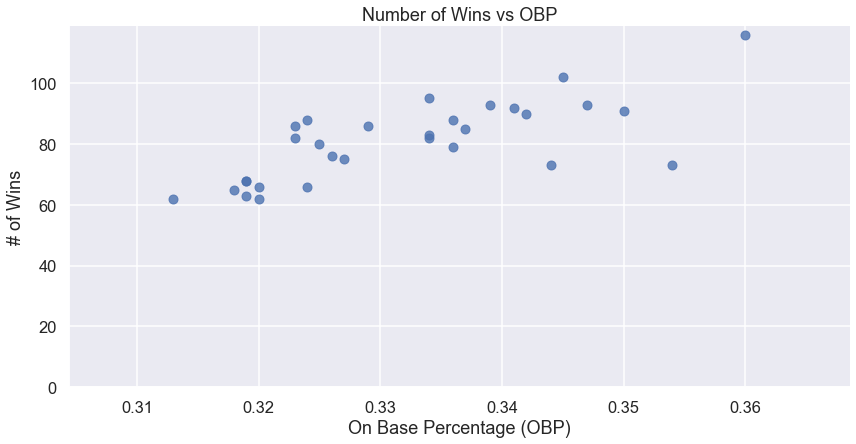

In [33]:
#Plot Wins vs OBP
W_vs_OBP_2001 = sns.lmplot(x='OBP', y='W', data=SeasonData_2001, fit_reg=False, height=6, aspect=2)


#Rename axes
W_vs_OBP_2001 = plt.xlabel("On Base Percentage (OBP)")
W_vs_OBP_2001 = plt.ylabel("# of Wins")
W_vs_OBP_2001 = plt.title('Number of Wins vs OBP')

W_vs_OBP_2001 = plt.ylim(ymin=0) 

Visually, we notice that there seems to be a positve linear relationship between the number of wins and On Base Percentage so we run a linear regression. 

In [34]:
#Run linear regression
outcome_OBP, predictors_OBP = patsy.dmatrices('W ~ OBP', SeasonData_2001)

mod_OBP = sm.OLS(outcome_OBP, predictors_OBP)

res_OBP = mod_OBP.fit()
print(res_OBP.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     32.17
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           4.44e-06
Time:                        14:23:53   Log-Likelihood:                -107.55
No. Observations:                  30   AIC:                             219.1
Df Residuals:                      28   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -181.8066     46.351     -3.922      0.0

The regression results show that for every 1 point increase in OBP, we will see an 791 game increase in the number of games won. However, OBP doesn't typically vary by a full point, as we can see from the plot above. So, if we look at when OBP increases by .01, which is much more typical of OBP, we would see a roughly 8 game increase in the number of games won.  

Next we want to explore the relationship between the number of wins and the number of runs, walks, and hits. 

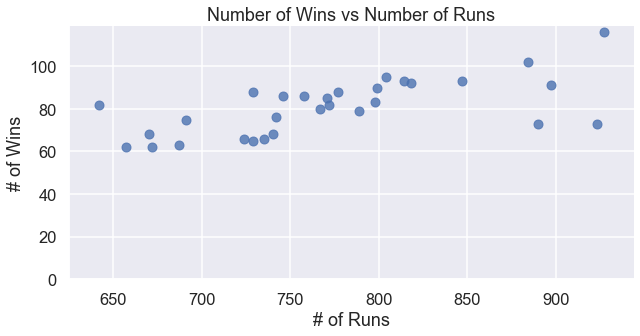

In [35]:
#Plot Wins vs R
W_vs_R_2001 = sns.lmplot(x='R', y='W', data=SeasonData_2001, fit_reg=False, height=4.5, aspect=2)

    
#Rename axes
W_vs_R_2001 = plt.xlabel("# of Runs")
W_vs_R_2001 = plt.ylabel("# of Wins")
W_vs_R_2001 = plt.title('Number of Wins vs Number of Runs')

W_vs_R_2001 = plt.ylim(ymin=0) 

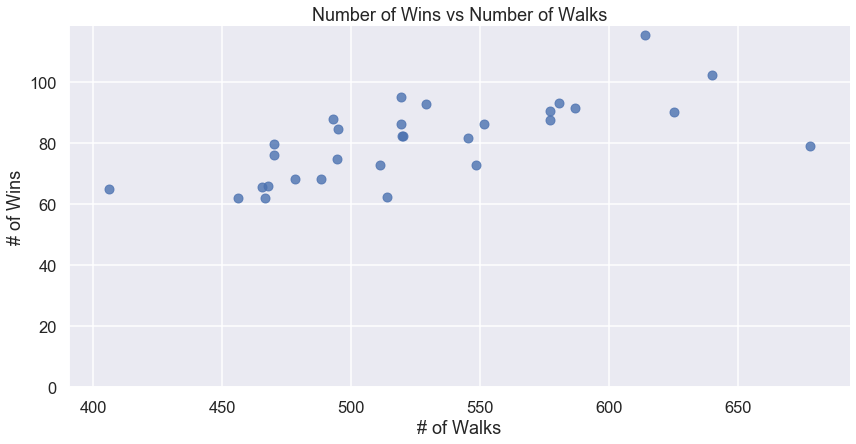

In [36]:
#Plot Wins vs BB
W_vs_BB_2001 = sns.lmplot(x='BB', y='W', data=SeasonData_2001, fit_reg=False, height=6, aspect=2, x_jitter=.5, y_jitter=.5,)
    
#Rename axes
W_vs_BB_2001 = plt.xlabel("# of Walks")
W_vs_BB_2001 = plt.ylabel("# of Wins")
W_vs_BB_2001 = plt.title('Number of Wins vs Number of Walks')

W_vs_BB_2001 = plt.ylim(ymin=0) 

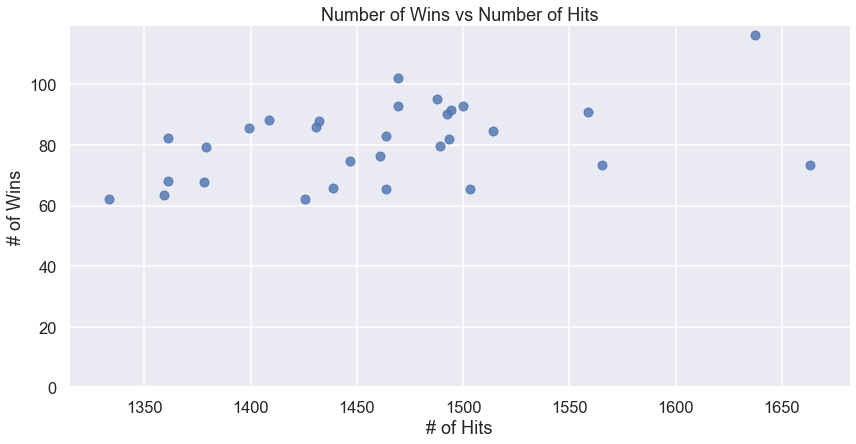

In [37]:
#Plot Wins vs Hits
W_vs_H_2001 = sns.lmplot(x='H', y='W', data=SeasonData_2001, fit_reg=False, height=6, aspect=2, x_jitter=.5, y_jitter=.5,)
    
#Rename axes
W_vs_H_2001 = plt.xlabel("# of Hits")
W_vs_H_2001 = plt.ylabel("# of Wins")
W_vs_H_2001 = plt.title('Number of Wins vs Number of Hits')

W_vs_H_2001 = plt.ylim(ymin=0) 

We see a positive linear relationship between these variables. We expect runs, hits, and walks to be correlated so we must run multiple linear regressions because we can't assume no multicollinearity and run individual linear regressions.

In [38]:
#Run multiple linear regressions
outcome_RandHandBB, predictors_RandHandBB = patsy.dmatrices('W ~ R + H + BB', SeasonData_2001)

mod_RandHandBB = sm.OLS(outcome_RandHandBB, predictors_RandHandBB)

res_RandHandBB = mod_RandHandBB.fit()
print(res_RandHandBB.summary())


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     11.58
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           5.27e-05
Time:                        14:23:54   Log-Likelihood:                -106.30
No. Observations:                  30   AIC:                             220.6
Df Residuals:                      26   BIC:                             226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.1307     49.098     -1.164      0.2

We notice a warning about strong multicollinearity so we calculate VIF, Variance Inflation Factor, in order to see which of the exploratory variables are strongly correlated.

In [39]:
#find design matrix for linear regression model using 'W' as response variable 
y, X = dmatrices('W ~ R+H+BB', data=SeasonData_2001, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,895.268876,Intercept
1,7.547970,R
2,5.251502,H
3,2.502565,BB


VIF starts at 1 and goes up indefinitely. A VIF of 1 means no correlation between the variables and as the value of VIF increases it demonstrates a stronger correlation between the variables.

A VIF value greater than 5 indicates potentially severe correlation between a given exploratory variable and other exploratory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable. So, we choose to drop runs since this is the variable with the largest VIF.

In [40]:
SeasonData_2001 = SeasonData_2001.drop(columns =['R'])
#Run multiple linear regressions
outcome_HandBB, predictors_HandBB = patsy.dmatrices('W ~ H + BB', SeasonData_2001)

mod_HandBB = sm.OLS(outcome_HandBB, predictors_HandBB)

res_HandBB = mod_HandBB.fit()
print(res_HandBB.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     17.90
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.12e-05
Time:                        14:23:54   Log-Likelihood:                -106.36
No. Observations:                  30   AIC:                             218.7
Df Residuals:                      27   BIC:                             222.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.2248     32.280     -2.144      0.0

In [41]:
#find design matrix for linear regression model using 'W' as response variable 
y1, X1 = dmatrices('W ~ H+BB', data=SeasonData_2001, return_type='dataframe')

#calculate VIF for each explanatory variable
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1['variable'] = X1.columns

#view VIF for each explanatory variable 
vif1

,VIF,variable
0,400.193717,Intercept
1,1.030254,H
2,1.030254,BB


Now, after adjusting for multicollinearity, we see that the VIF for hits and walks is close to 1 so we continue with our analysis. Our model shows that walks has a larger effect on the number of wins than hits does. For every additional walk, the number of games a team wins is expected to increase by .132, where for every additional hit, the number of games a team wins is expected to increase by .055.

While the effect size of walks may be larger, we notice that there are typically much more hits than walks during a season. Since walks are less common and the difference in effect size is minimal, we expect that whether a player gets on base via walk or hit makes little difference in the amount of games won. 

Now we look to our simulation data to compare a typical season to a season where players can only get on base via walk to explore the difference in specific teams. We know that Barry Bonds is an outlier, with a large amount of home runs, so we will also run a simulation that walks Barry Bonds to first base in the case that he hits the ball to visualize the impact that he had on the Giants' wins for the 2001 season.

## Visualizing Simulation Data

### Grouped barplot of  Normal season and a Walks Only season

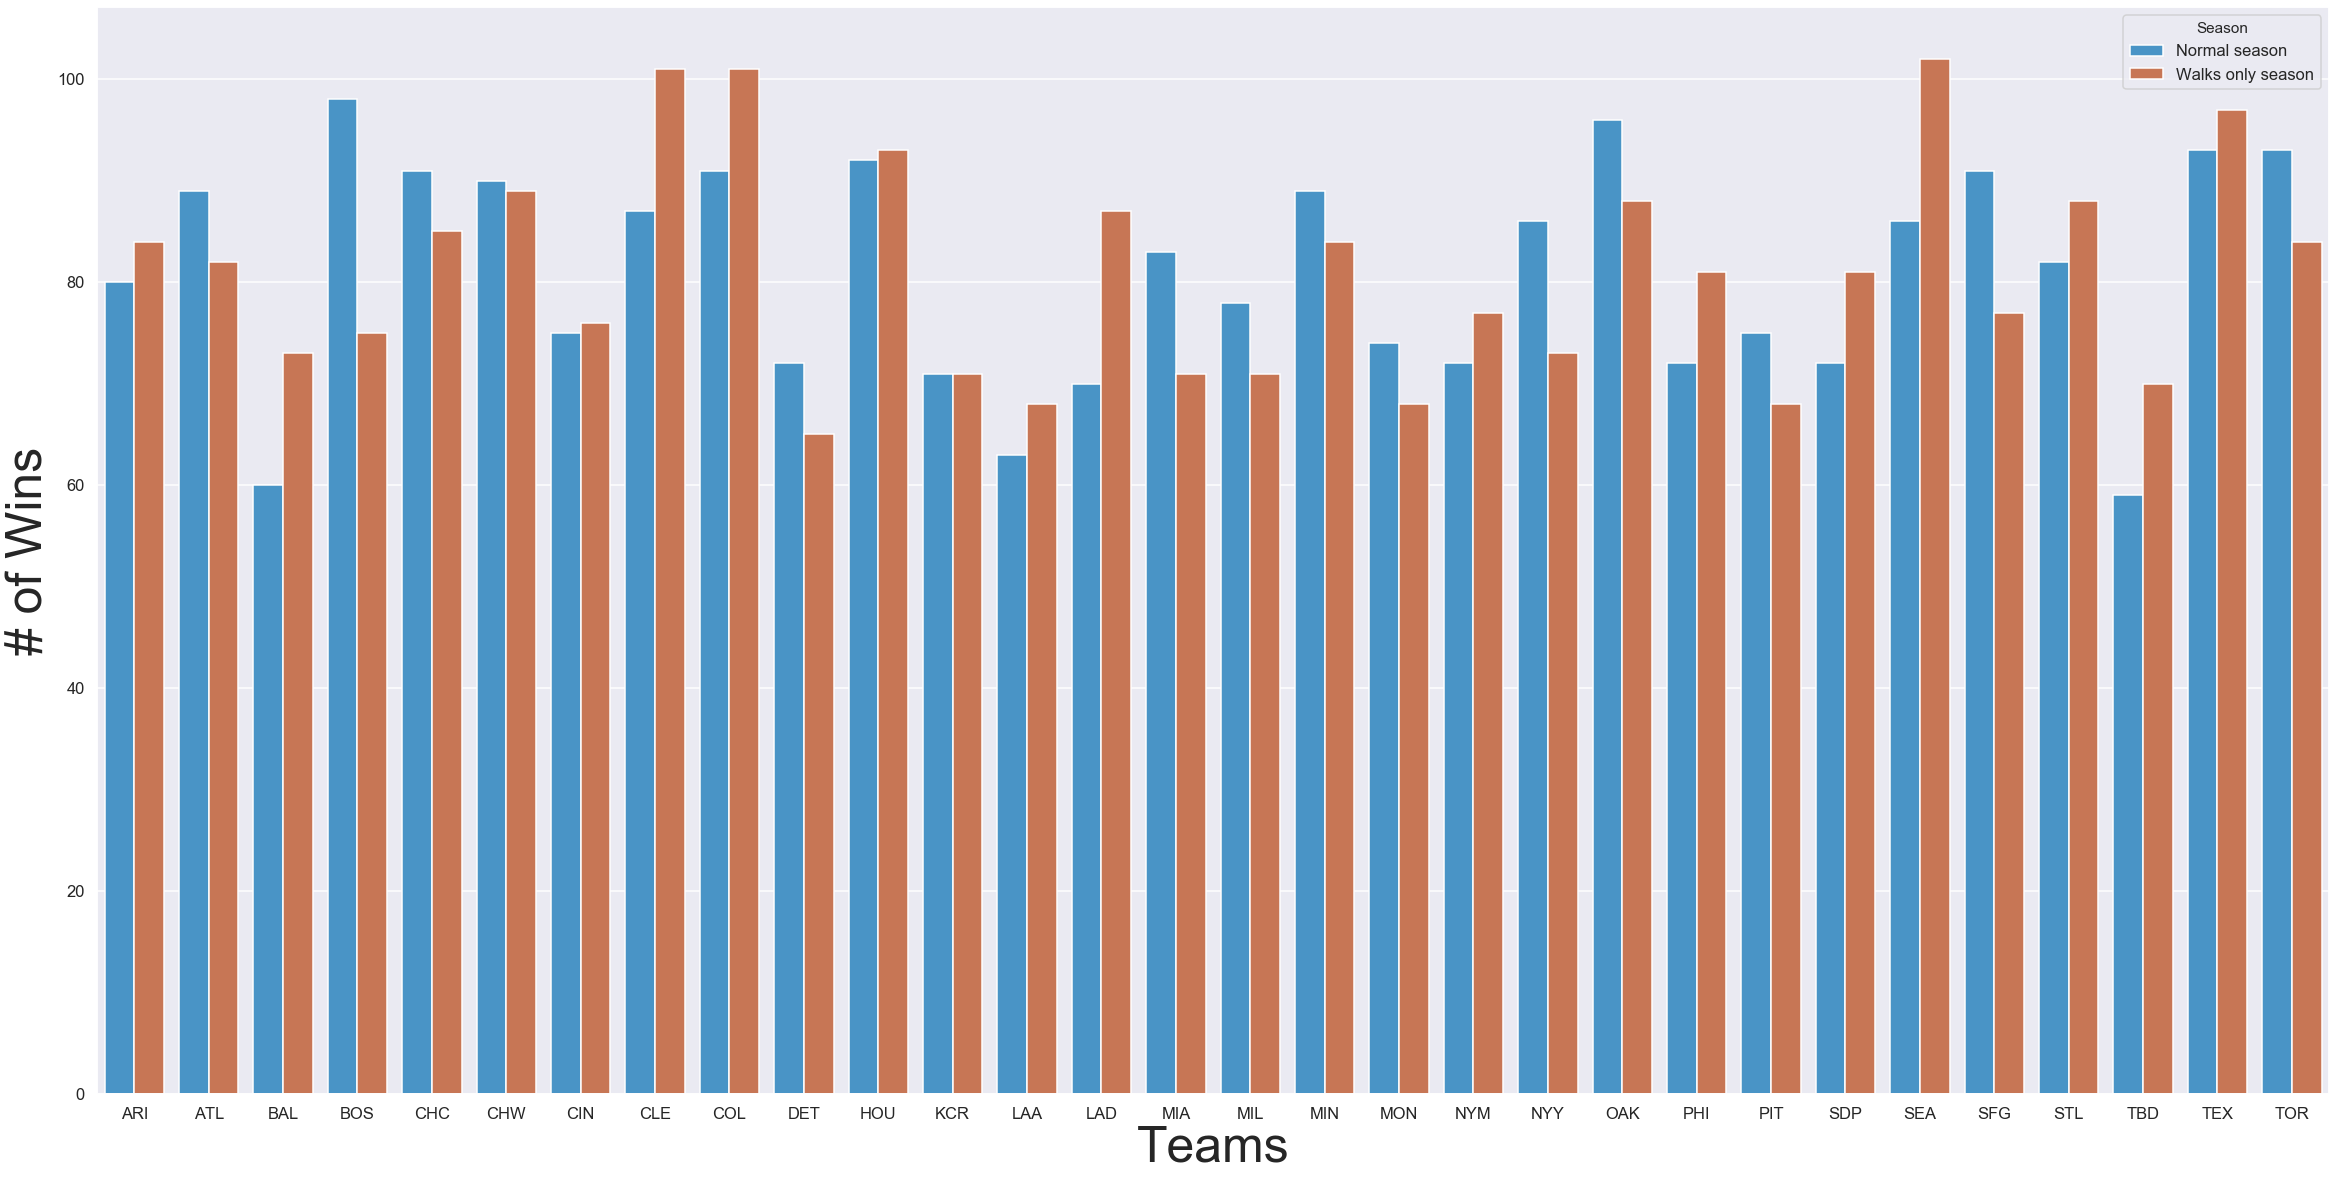

In [42]:
#Color palette
palette_1 = [ "#3498db",  "#DA6E42"] 
sns.set_palette( palette_1 )

#Create grouped barplots
plt.figure(figsize=(40,20))
Simulations_barplot = sns.barplot(x='Team', y='Wins', hue='Season', data=SimulationsData)

#Rename axes
Simulations_barplot = plt.ylabel("# of Wins", size=50)
Simulations_barplot = plt.xlabel("Teams", size=50)



### Grouped barplot of a Normal season, without Barry Bonds and a Walks Only Season

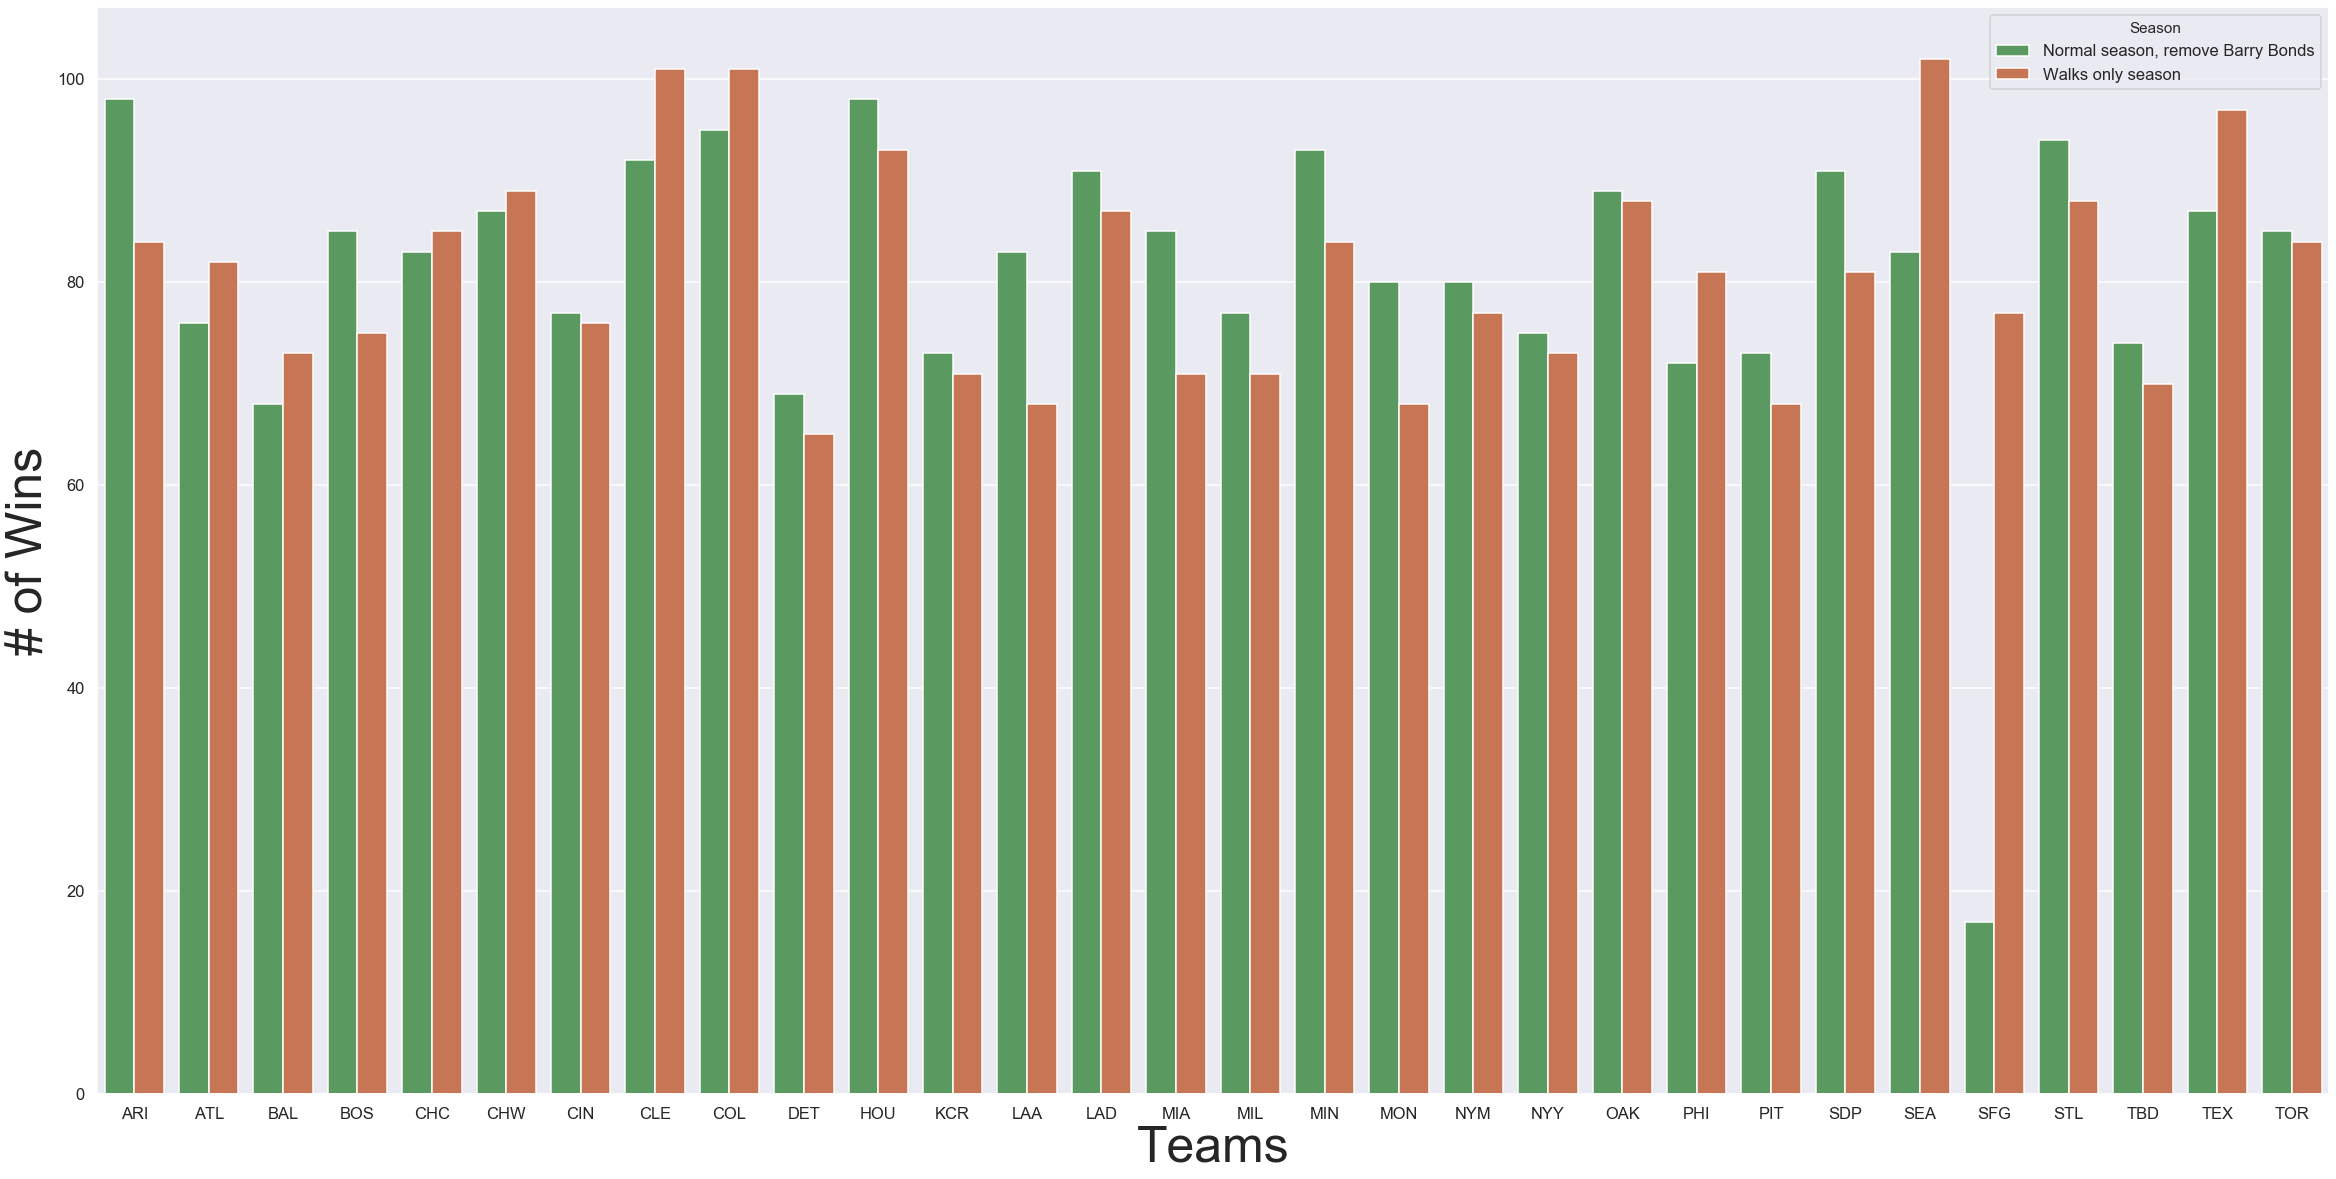

In [43]:
#Color palette
palette_2 = [ "#4FA557",  "#DA6E42"] 
sns.set_palette( palette_2 )

#Create grouped barplots
plt.figure(figsize=(40,20))
Simulations_noBB_barplot = sns.barplot(x='Team', y='Wins', hue='Season', data=SimulationsData_noBB)

#Rename axes
Simulations_noBB_barplot = plt.ylabel("# of Wins", size=50)
Simulations_noBB_barplot = plt.xlabel("Teams", size=50)

Here we can see that in the case of the San Francisco Giants, Barry Bonds had a large impact on the team's number of wins due to the amount of Home Runs he hits. This data, as well as the data from the real 2001 season show us that the way a player gets on base can not be the sole factor used to predict number of games won. We have seen that the amount of hits and walks during a season, as well as individual player statistics and tendencies also play a role.

Next we will look at the distribution of average runs per game for all three simulation scenarios.
### Normal Season Simulation

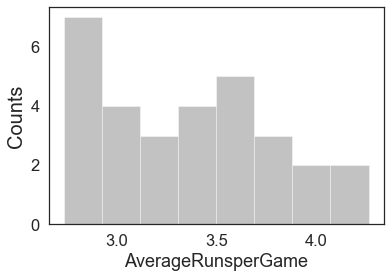

In [50]:
Normal_hist = sns.distplot(Normal_sim['AverageRunsperGame'], kde = False, bins=8, color='#686868')
Normal_hist = plt.ylabel("Counts", size=20)
sns.set(font_scale=1.5, style="white")

### Normal season, without Barry Bonds

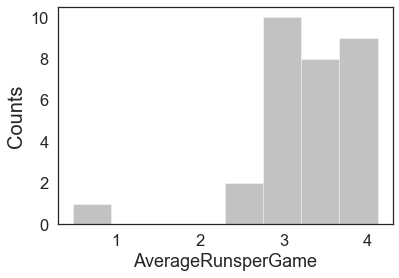

In [51]:
Normal_noBB_hist = sns.distplot(Normal_noBB_sim['AverageRunsperGame'], kde = False, bins=8, color='#686868')
Normal_noBB_hist = plt.ylabel("Counts", size=20)
sns.set(font_scale=1.5, style="white")

### Walks Only Simulation

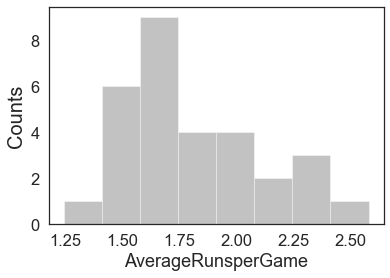

In [52]:
WalksOnly_hist = sns.distplot(WalksOnly_sim['AverageRunsperGame'], kde = False, bins=8, color='#686868')
WalksOnly_hist  = plt.ylabel("Counts", size=20)
sns.set(font_scale=1.5, style="white")

Here we can see that the average number of runs per game from the Walks Only season is less than the average number of runs for the Normal season, as expected. We can also see that for the Normal Season without Barry Bonds, there is one team that averages less runs per game than any of the teams during the Walks Only season. This outlier team is the Giants and shows even further the impact that one player can have on the score of the game. Because of the impact that a variety of facrors have on the result of games, it's difficult for us to draw a conclusion about whether getting on base via walk or hit is explicitly better. 

# Ethics & Privacy

We’re looking to use statistics from Major League Baseball players, so the data that we’re looking to use is publicly available. MLB collects and publishes this information, so there aren’t privacy concerns for the data we’re looking to use. Since MLB is collecting the data from each game played, it is unlikely that data collected would be biased. The data is pulled from the 2001 MLB season. Given the number of games the data size is large enough. Removing one of the best hitters in the league from one of the best teams in the league should give an explanation of whether hits or walks are more important to getting wins.

One potential ethical problem that our project presents is the effect of our results on the quality of life of MLB players. If we determine that an individual player may not contribute to overall wins as much as previously thought, this player may not be paid as high in the future. We’ll handle this issue by making no arguments or suggestions as to whether players are overpaid or underpaid, simply offer analysis on whether how a runner gets on base contributes to MLB wins.

# Conclusion & Discussion

In this project, we sought to determine whether the way that a batter gets on base affects the number of wins in an MLB season. To answer this, we gathered data on the hit percentages of different teams (single vs double vs triple, OBP, etc.) as well as the individual statistics of each player on the San Francisco Giants where Barry Bonds played. To analyze the data, we first looked at the real-world effect size of hits, runs, and walks on wins. After running multiple linear regression, we found that there was strong multicollinearity between these statistics (VIF value was over five) and so, determined that a different approach would have to used to analyze whether or not the way that a batter gets on base affects wins. In pursuit of this, we simulated the 2001 MLB season under various conditions (a normal season using real-world data, a season in which the only way a batter got on base was via walk, and a normal season except the only way that Barry Bonds could get on base was via walk). After simulating the seasons we found that the effect of only walking players onto base did not significantly impact the number of wins across a season, though walking only Barry Bonds did have a significant impact on the number of wins for the San Francisco Giants. 

Our results indicate that considerning solely the way that a batter gets on base when predidcting number of wins is not significant. This is most likely due to the fact that the significance of walks on team win percentage may be affected by other factors such as the sequence of batters walked in terms of the lineup or OPS of walked players. As such, we have concluded that the way that a batter gets on base in general is not the strongest indicator of wins in a season, though this analysis may be used in conjunction with other factors (sequence of walked batters in the lineup and OPS of walked players) to better understand how walks can affect a team's win percentage. As we did our analysis, we ran into additional data that shows that the answer to our question was outside of the scope of our project as the deeper causes of how a batter gets on base affect team win percentage are varied and not completely understood. Understanding this, while we were able to indicate that the way that a batter gets on base is not indicative of win percentage, it fails to address larger questions of how walks affect team win percentage as it does not take into account factors that may amplify or reduce the effect size of walks on team win percentage including placement of the walked batter in the lineup, or the effect of only walking players with abnormally high OPS as the only player we ran this analysis for was . 

This work contributes to a growing understanding of how walks may affect team win percentage. When teams look to replace players, they should focus on different things besides raw OPS as demonstrated in this study. For instance if the replacement player is closer to the middle of the lineup, then it is more likely that a larger OPS would have more of an effect on wins than if the batter was at the ends. Overall, this analysis may impact how teams choose to replace players, valuing different statistics based on where in the lineup prospective players will be placed as well as what players will be worthy of contracts based on relative effect they would have on team win percentage after taking into account lineup.


# Team Contributions

- Jack:
    - Built all three simulations
      - Walks Only Simulation
      - Normal Season Simulation
      - Barry Bonds only Walking Simulation
    - Explanations present in Data Cleaning section related to the Simulations
    - Got Giants team data and the schedule for the 2001 season
    - Hosted and scheduled all Zoom Meetings
- Abi:
     - Data Analysis Entirely
     - Data Cleaning Sections:
          - Clean 2001 Season Data for Visualizations and Analysis
          - Clean Simulates 2001 Data for Visualizations
- Justin:
     - Overview
     - Conclusion
     - Wrote Data Sets section
- Adam:
     - Uploaded Team stats data for 2001 season
     - Renamed variables for data frames in the simulation so the data would not be changed in the same file
     - Assisted with Data Analysis
     - Put the simulation code into final project template